<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [4]:
import pandas as pd
import matplotlib as plt
from sklearn.metrics import mean_absolute_error 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [5]:
data =pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [6]:
def primary_analysis(data):
    display(data.head())
    print(data.info())


In [7]:
for  i in range(len(data_train)):
    C = data_train.loc[i, 'rougher.output.concentrate_au']
    F = data_train.loc[i, 'rougher.input.feed_au']
    T = data_train.loc[i, 'rougher.output.tail_au']
    
    data_train.loc[i,'rougher.output.recovery_2'] = ((C * (F - T)) / (F * (C - T))) * 100
    
train_mae = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_2'])




In [8]:
print(train_mae)
print(len(data_train))

9.682896147825551e-15
14149


Рассчитанный показатель эффективности обогащения практически не отличается от фактического значения. Средняя абсолютная ошибка равна $9.68*10^{-15}$. Это означает корректность поступивших показателей.

In [9]:
primary_analysis(data)



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [10]:
# primary_analysis(data_test)

In [11]:
#Столбцы, которых нет в тестовой выборке
train_columns = list(data_train.columns)
test_columns = list(data_test.columns)
train_notin_test = list(filter(lambda train_columns: train_columns not in test_columns, train_columns))
train_notin_test = pd.Series(train_notin_test)
display(train_notin_test)

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

В тестовой выборке отсутствуют данные о параметрах продукта после этапов обработки.

In [12]:
data_train = data_train.drop_duplicates().reset_index(drop=True)
data_train = data_train.dropna().reset_index(drop=True)
data_train['date'] = pd.to_datetime(data_train['date'])
print(data_train.info())

data_test = data_test.drop_duplicates().reset_index(drop=True)
data_test = data_test.dropna().reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 88 columns):
date                                                  11017 non-null datetime64[ns]
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant     

Удалил из обучающей выборки все строки с пропущенными значениями.

## Анализ данных

In [13]:
#Датафреймы с признаки металлов
stages_au = data_train.loc[:, ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 
                           'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au', 
                           'final.output.concentrate_au', 'secondary_cleaner.output.tail_au']]

stages_ag = data_train.loc[:, [ 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'rougher.output.tail_ag', 
                           'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 
                           'final.output.concentrate_ag', 'secondary_cleaner.output.tail_ag']]

stages_pb = data_train.loc[:, [ 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'rougher.output.tail_pb', 
                           'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 
                           'final.output.concentrate_pb', 'secondary_cleaner.output.tail_pb']]


In [14]:
# stages_au_median = stages_au.median()
def stages_plot(data, el):
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
        plt.title('Концентрация {} в  сырье, после обработки и в отвалах'.format(el))
    plt.show()
      


rougher.input.feed_au                     7.865763
rougher.output.concentrate_au            20.262237
rougher.output.tail_au                    1.815137
primary_cleaner.output.concentrate_au    33.017232
primary_cleaner.output.tail_au            3.591438
final.output.concentrate_au              44.802196
secondary_cleaner.output.tail_au          3.956902
dtype: float64


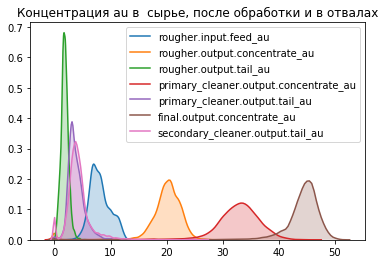

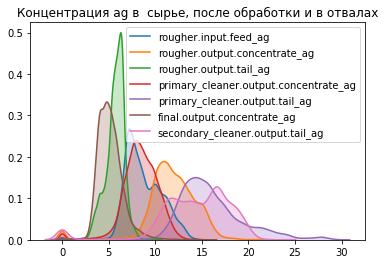

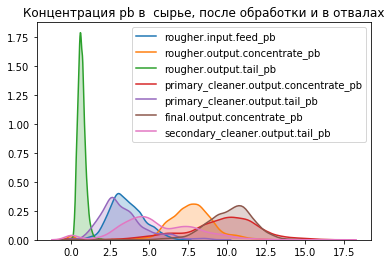

In [15]:
print(stages_au.median())
stages_plot(stages_au, 'au')
stages_plot(stages_ag, 'ag')
stages_plot(stages_pb, 'pb')
# stages_plot(stages_sol, 'sol')

Концентрация золота после флотации и каждой степени очистки возрастает, при это концентрация золота в отвалах практически не меняется во время первичной и вторичной очистки.
Концентрация серебра после флотации выросла, но при последующих степенях очистки концентрация в продукте падала, а концентрация в отвалах практически не менялась.
Концентрация свинца после флотации также увеличилась, при последующих этапах очистки  концентрация увеличилась примерно на 20%, при этом концентрация в отвалах также росла.


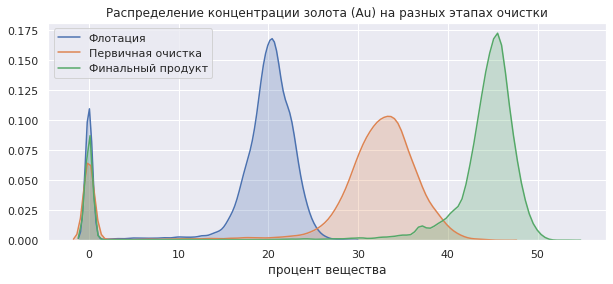

Text(0, 0.5, 'перед флотацией')

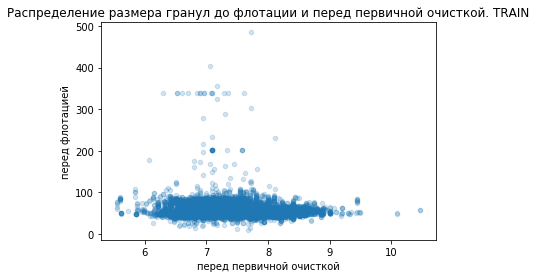

In [16]:
#Распределение размеров гранул сырья
data_train = data_train[data_train['primary_cleaner.input.feed_size'] > 5] #Снача прогнал без этой строки, увидел там выбросы
dis_train = data_train.plot(kind='scatter', x='primary_cleaner.input.feed_size', y='rougher.input.feed_size', alpha=0.2,
                      title='Распределение размера гранул до флотации и перед первичной очисткой. TRAIN')
dis_train.set_xlabel('перед первичной очисткой')
dis_train.set_ylabel('перед флотацией')



Text(0, 0.5, 'перед флотацией')

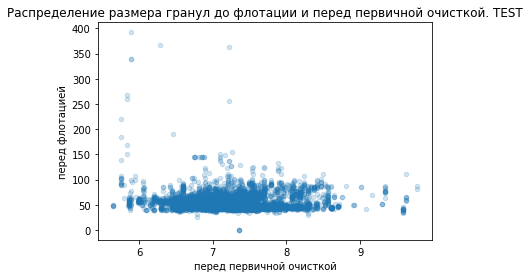

In [17]:
data_test = data_test[data_test['primary_cleaner.input.feed_size'] < 11] #Снача прогнал без этой строки, увидел там выбросы
dis_test = data_test.plot(kind='scatter', x='primary_cleaner.input.feed_size', y='rougher.input.feed_size', alpha=0.2,
                      title='Распределение размера гранул до флотации и перед первичной очисткой. TEST')
dis_test.set_xlabel('перед первичной очисткой')
dis_test.set_ylabel('перед флотацией')


После удаления выбросов распределения стали похожи. 

In [18]:
#Суммарная концентрация веществ в черновом концентрате

# sum_float_consentrate = data_train[['date','rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']]
# sum_float_consentrate = sum_float_consentrate.pivot_table(index='date', values=['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'], aggfunc='sum')                                              

def stages (el_1, el_2, el_3):
    sum_float = (data_train[el_1] + data_train[el_2] + data_train[el_3])
    lower_quan = sum_float.quantile(q=0.025)
    hight_quan = sum_float.quantile(q=0.975)
    
    
    print(sum_float.plot(kind='hist', bins=100))
    print('2.5% quantile:',lower_quan)
    print('97.5% quantile:',hight_quan)
    print('median:', sum_float.median())
    print('mean:', sum_float.mean())
    return  lower_quan, hight_quan, sum_float

AxesSubplot(0.125,0.125;0.775x0.755)
2.5% quantile: 36.58595933284932
97.5% quantile: 57.40047564564345
median: 49.19783697043188
mean: 48.88152749475451


(36.58595933284932,
 57.40047564564345,
 0        45.193884
 1        44.180531
 2        44.247707
 3        44.943356
 4        42.195456
            ...    
 11012    48.079187
 11013    48.857863
 11014    50.064543
 11015    49.664573
 11016    49.169563
 Length: 11002, dtype: float64)

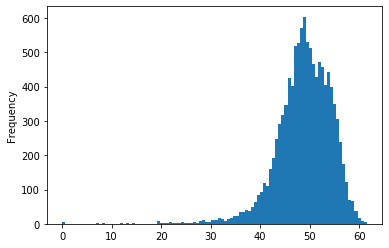

In [19]:
stages('rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol')


AxesSubplot(0.125,0.125;0.775x0.755)
2.5% quantile: 24.150637352909804
97.5% quantile: 58.97541435310186
median: 49.557273143298985
mean: 48.11914030502266
Колличество партий без примесей: 210


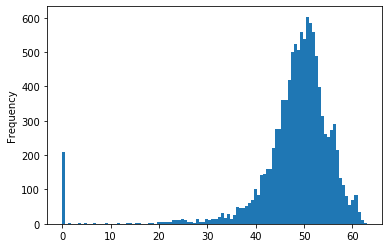

In [20]:
lower_con, hight_con, sum_float_con = stages('rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol')
print('Колличество партий без примесей:', len(list(filter(lambda x: x < 1, sum_float_con))))

AxesSubplot(0.125,0.125;0.775x0.755)
2.5% quantile: 18.36430419159545
97.5% quantile: 32.62194114233505
median: 24.68294528421613
mean: 24.930344584491834
Колличество партий без примесей: 29


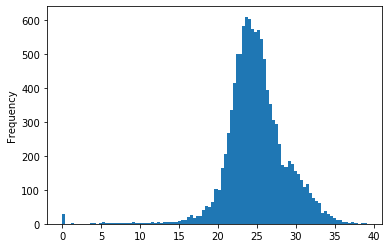

In [21]:
lower_fin, hight_fin, sum_float_fin = stages('final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol')
print('Колличество партий без примесей:',len(list(filter(lambda x: x < 1, sum_float_fin))))

Средняя и медианная суммарная концентрация веществ в сырье/в черновом концентрате практически одинакова. В финальном концентрате доля примесей снижается в 2 раза по сравнению с сырьем.
После флотации и вторичной очистки есть выброс около 0. Вряд ли самородки, так как их становится меньше в финальном концентрате. Уберем их и пересчитаем среднее

In [22]:
print(pd.Series(filter(lambda x: x > 1, sum_float_con)).mean())
print(pd.Series(filter(lambda x: x > 1, sum_float_fin)).mean())

49.05546994401989
24.99623176146716


Мало что изменилось. Итог, примесей стало в 2 раза меньше.

## Модель

In [23]:
features = data_train.drop(train_notin_test, axis=1).drop('date', axis=1) #общие признаки для 2х пердсказаний

target_fin = data_train['final.output.recovery']
target_rou = data_train['rougher.output.recovery']


features_train, features_valid, target_train_rou, target_valid_rou = train_test_split(features, target_rou,
                                                                                       random_state=12345, test_size=0.25)

features_train, features_valid, target_train_fin, target_valid_fin = train_test_split(features, target_fin,
                                                                                       random_state=12345, test_size=0.25)

features, target_fin, target_rou = shuffle(features, target_fin, target_rou, random_state=12345)

# print(target_rou.info())

In [24]:
#sMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#финальная метрика sMAPE
def smape_2 (smape_rougher, smape_final):
    return 0.25*smape_rougher + 0.75 * smape_final 

In [25]:
def model_lr(target_train_, target_valid_):   

    model_lr = LinearRegression()
    model_lr.fit(features_train, target_train_)
    predicted_lr = model_lr.predict(features_valid) 
    r2_lr = r2_score(target_valid_, predicted_lr)
    smape_lr = smape(predicted_lr, target_valid_)
    

    return  model_lr, smape_lr, r2_lr

In [26]:
#Значение кросс-валидации для модели линейной регрессии
model_lr_rou, smape_lr_rou, r2_rou = model_lr(target_train_rou, target_valid_rou)
print(cross_val_score(model_lr_rou, features, target_rou, cv=10).mean())
print('sMAPE модели Линейной Регресси для показателя "эффективность обогащения чернового концентрата" равен:{:.2%}'.format(smape_lr_rou/100))


model_lr_fin, smape_lr_fin, r2_fin = model_lr(target_train_fin, target_valid_fin)
print(cross_val_score(model_lr_fin, features, target_fin, cv=10).mean())

print('sMAPE модели Линейной Регресси для показателя "эффективность обогащения финального концентрата" равен:{:.2%}'.format(smape_lr_fin/100))

0.2884554881549526
sMAPE модели Линейной Регресси для показателя "эффективность обогащения чернового концентрата" равен:8.72%
0.3225136445313853
sMAPE модели Линейной Регресси для показателя "эффективность обогащения финального концентрата" равен:7.47%


Показатели Линейной Регрессии далеки от идеала. Посмотрим чтоу Случайного Леса.

In [27]:
def model_rfr(target_train_, target_valid_): 
    best_model = None
    best_smape = 100
    best_mae = 1000
    best_mse = 1000
    best_r2 = 0
    for est in range(1,50, 10):
        for depth in range(1,10,2):
            model_rfr = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
            model_rfr.fit(features_train, target_train_)
            predicted_rfr = model_rfr.predict(features_valid)
        
            r2 = r2_score(target_valid_rou, predicted_rfr)
#             mae = mean_absolute_error(target_valid_rou, predicted_rfr)
#             mse = mean_squared_error(target_valid_rou, predicted_rfr)
            smape_rfr = smape(predicted_rfr, target_valid_)
        if smape_rfr < best_smape:
            best_r2 = r2
            best_model = model_rfr
            best_smape = smape_rfr
#             best_mae = mae
#             best_mse = mse
    return  best_model, best_smape, best_r2

        

In [28]:
#Значение кросс-валидации для модели случайного леса
best_model_rfr_rou, smape_rfr_rou, best_r2_rou = model_rfr(target_train_rou, target_valid_rou)

best_model_rfr_fin, smape_rfr_fin, best_r2_fin = model_rfr(target_train_fin, target_valid_fin)


In [29]:
print('sMAPE модели Случайного Леса Регрессии для показателя "эффективность обогащения чернового концентрата" равен:{:.2%}'.format(smape_rfr_rou/100))
print(cross_val_score(best_model_rfr_rou, features, target_rou, cv=5).mean())
print('')

sMAPE модели Случайного Леса Регрессии для показателя "эффективность обогащения чернового концентрата" равен:7.08%
0.5264362243236936



In [30]:
print('sMAPE модели Случайного Леса Регрессии для показателя "эффективность обогащения финального концентрата" равен:{:.2%}'.format(smape_rfr_fin/100))
print(cross_val_score(best_model_rfr_fin, features, target_fin, cv=5).mean())

sMAPE модели Случайного Леса Регрессии для показателя "эффективность обогащения финального концентрата" равен:6.45%
0.47763465299034874


In [31]:
print(smape_2(smape_rfr_rou, smape_rfr_fin))

6.60934715550794


In [32]:
features_test = data_test.drop('date', axis=1)
data_test = copy.data
test_rou = data_test
test_rou = test_rou.merge(data[['date', 'rougher.output.recovery']], on='date')
test_rou = test_rou['rougher.output.recovery']

test_fin = data_test
test_fin = test_fin.merge(data[['date', 'final.output.recovery']], on='date')
test_fin = test_fin['final.output.recovery']


predicted_test_rou = best_model_rfr_rou.predict(features_test)
predicted_test_fin = best_model_rfr_fin.predict(features_test)

smape_rou = smape(predicted_test_rou, test_rou)
smape_fin = smape(predicted_test_fin, test_fin)

print('Для Линейной Регрессии sMAPE:',smape_2(smape_rou, smape_fin))
# print(len(predicted_test_rou))

NameError: name 'copy' is not defined

Общее симметричное среднее процентное отклонение не превышает 7%, что свидетельтвует о большой точности обученных моделей Случайного леса. Модель случайного леса позволяет предсказывать эффективность обогащения с погрешностью 6.6%, а вот модель линейной регрессии ошибается больше на 3.5%

In [ ]:
# Сравнение с Dammy моделью
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_train_rou)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = smape(dummy_rougher_pred, test_rou)
print(smape_dummy_rougher) 


dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features_train, target_train_fin)
dummy_final_pred = dummy_regressor_final.predict(features_test)
smape_dummy_final = smape(dummy_final_pred, test_fin)
print(smape_dummy_final) 

print('Для Dummy модели smape равен:', smape_2(smape_dummy_rougher, smape_dummy_final))

Если сравнивать с предсказанием константной модели, которая предсказывет медиану, то обученная модель случайного леса позволяет снизить симметричное среднее абсолютное процентное отклонение на 2.5%